In [7]:
# Numerical Computation
import numpy as np

# Data Handling
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Train-Test Split
from sklearn.model_selection import train_test_split

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation Metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve
)


In [8]:
df = pd.read_csv('D:\ML\Revision\credit_score.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\ahmed\AppData\Local\Temp\ipykernel_5324\2725750801.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv('D:\ML\Revision\credit_score.csv')


,CUST_ID,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,...,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
0,C02COQEVYU,33269,0,532304,0.0000,16.0000,1.2000,1889,945,0.5003,...,0.0000,0.0625,High,1,0,0,0,0,444,1
1,C02OZKC0ZF,77158,91187,315648,1.1818,4.0909,3.4615,5818,111,0.0191,...,0.7692,0.2222,No,1,0,0,1,0,625,0
2,C03FHP2D0A,30917,21642,534864,0.7000,17.3000,24.7142,1157,860,0.7433,...,1.4286,0.0578,High,1,0,0,1,0,469,1
3,C03PVPPHOY,80657,64526,629125,0.8000,7.8000,9.7499,6857,3686,0.5376,...,1.2500,0.1282,High,1,0,0,1,0,559,0
4,C04J69MUX0,149971,1172498,2399531,7.8182,16.0000,2.0465,1978,322,0.1628,...,0.1163,0.0568,High,1,1,1,1,1,473,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 87 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CUST_ID                  1000 non-null   object 
 1   INCOME                   1000 non-null   int64  
 2   SAVINGS                  1000 non-null   int64  
 3   DEBT                     1000 non-null   int64  
 4   R_SAVINGS_INCOME         1000 non-null   float64
 5   R_DEBT_INCOME            1000 non-null   float64
 6   R_DEBT_SAVINGS           1000 non-null   float64
 7   T_CLOTHING_12            1000 non-null   int64  
 8   T_CLOTHING_6             1000 non-null   int64  
 9   R_CLOTHING               1000 non-null   float64
 10  R_CLOTHING_INCOME        1000 non-null   float64
 11  R_CLOTHING_SAVINGS       1000 non-null   float64
 12  R_CLOTHING_DEBT          1000 non-null   float64
 13  T_EDUCATION_12           1000 non-null   int64  
 14  T_EDUCATION_6            

In [8]:
df.describe()

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
count,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,121610.019000,4.131896e+05,7.907180e+05,4.063477,6.068449,5.867252,6822.401000,3466.320000,0.454848,0.055557,...,0.943607,0.913340,0.605276,0.944000,0.236000,0.173000,0.993000,0.15000,586.712000,0.284000
std,113716.699591,4.429160e+05,9.817904e+05,3.968097,5.847878,16.788356,7486.225932,5118.942977,0.236036,0.037568,...,0.168989,1.625278,1.299382,0.230037,0.424835,0.378437,0.083414,0.35725,63.413882,0.451162
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003400,...,0.666700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,300.000000,0.000000
25%,30450.250000,5.971975e+04,5.396675e+04,1.000000,1.454500,0.206200,1084.500000,319.500000,0.263950,0.029700,...,0.833300,0.158700,0.100000,1.000000,0.000000,0.000000,1.000000,0.00000,554.750000,0.000000
50%,85090.000000,2.738505e+05,3.950955e+05,2.545450,4.911550,2.000000,4494.000000,1304.000000,0.468850,0.046800,...,0.909100,0.327950,0.178600,1.000000,0.000000,0.000000,1.000000,0.00000,596.000000,0.000000
75%,181217.500000,6.222600e+05,1.193230e+06,6.307100,8.587475,4.509600,10148.500000,4555.500000,0.626300,0.069400,...,1.000000,0.833300,0.588200,1.000000,0.000000,0.000000,1.000000,0.00000,630.000000,1.000000
max,662094.000000,2.911863e+06,5.968620e+06,16.111200,37.000600,292.842100,43255.000000,39918.000000,1.058300,0.251700,...,2.000200,10.009900,10.005300,1.000000,1.000000,1.000000,1.000000,1.00000,800.000000,1.000000


In [13]:
# Drop customer ID column (not useful for ML)
df = df.drop(columns=["CUST_ID"])

In [12]:
df.head()

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
0,33269,0,532304,0.0000,16.0000,1.2000,1889,945,0.5003,0.0568,...,0.0000,0.0625,High,1,0,0,0,0,444,1
1,77158,91187,315648,1.1818,4.0909,3.4615,5818,111,0.0191,0.0754,...,0.7692,0.2222,No,1,0,0,1,0,625,0
2,30917,21642,534864,0.7000,17.3000,24.7142,1157,860,0.7433,0.0374,...,1.4286,0.0578,High,1,0,0,1,0,469,1
3,80657,64526,629125,0.8000,7.8000,9.7499,6857,3686,0.5376,0.0850,...,1.2500,0.1282,High,1,0,0,1,0,559,0
4,149971,1172498,2399531,7.8182,16.0000,2.0465,1978,322,0.1628,0.0132,...,0.1163,0.0568,High,1,1,1,1,1,473,0


In [12]:
df.tail()

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
995,328892,1465066,5501471,4.4546,16.7273,3.7551,16701,10132,0.6067,0.0508,...,0.2041,0.0543,High,1,1,1,1,1,418,0
996,81404,88805,680837,1.0909,8.3637,7.6667,5400,1936,0.3585,0.0663,...,0.8333,0.1087,No,1,0,0,1,0,589,1
997,0,42428,30760,3.2379,8.1889,0.7250,0,0,0.8779,0.0047,...,0.2500,0.3448,No,1,0,0,1,0,499,0
998,36011,8002,604181,0.2222,16.7777,75.5037,1993,1271,0.6377,0.0553,...,5.0002,0.0662,No,1,1,0,1,0,507,0
999,44266,309859,44266,6.9999,1.0000,0.1429,1574,1264,0.8030,0.0356,...,0.1587,1.1111,No,1,0,0,1,0,657,0


In [14]:
missing_values = df.isnull().sum()
print(missing_values)

INCOME                 0
SAVINGS                0
DEBT                   0
R_SAVINGS_INCOME       0
R_DEBT_INCOME          0
                      ..
CAT_MORTGAGE           0
CAT_SAVINGS_ACCOUNT    0
CAT_DEPENDENTS         0
CREDIT_SCORE           0
DEFAULT                0
Length: 86, dtype: int64


In [16]:
### Exploratory Data Analysis (EDA) 

In [10]:
### Handling Duplicates and Redundant Data

In [15]:
df.duplicated().sum()
df= df.drop_duplicates()
df

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
0,33269,0,532304,0.0000,16.0000,1.2000,1889,945,0.5003,0.0568,...,0.0000,0.0625,High,1,0,0,0,0,444,1
1,77158,91187,315648,1.1818,4.0909,3.4615,5818,111,0.0191,0.0754,...,0.7692,0.2222,No,1,0,0,1,0,625,0
2,30917,21642,534864,0.7000,17.3000,24.7142,1157,860,0.7433,0.0374,...,1.4286,0.0578,High,1,0,0,1,0,469,1
3,80657,64526,629125,0.8000,7.8000,9.7499,6857,3686,0.5376,0.0850,...,1.2500,0.1282,High,1,0,0,1,0,559,0
4,149971,1172498,2399531,7.8182,16.0000,2.0465,1978,322,0.1628,0.0132,...,0.1163,0.0568,High,1,1,1,1,1,473,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,328892,1465066,5501471,4.4546,16.7273,3.7551,16701,10132,0.6067,0.0508,...,0.2041,0.0543,High,1,1,1,1,1,418,0
996,81404,88805,680837,1.0909,8.3637,7.6667,5400,1936,0.3585,0.0663,...,0.8333,0.1087,No,1,0,0,1,0,589,1
997,0,42428,30760,3.2379,8.1889,0.7250,0,0,0.8779,0.0047,...,0.2500,0.3448,No,1,0,0,1,0,499,0
998,36011,8002,604181,0.2222,16.7777,75.5037,1993,1271,0.6377,0.0553,...,5.0002,0.0662,No,1,1,0,1,0,507,0


In [20]:
print(df.columns)

Index(['INCOME', 'SAVINGS', 'DEBT', 'R_SAVINGS_INCOME', 'R_DEBT_INCOME',
       'R_DEBT_SAVINGS', 'T_CLOTHING_12', 'T_CLOTHING_6', 'R_CLOTHING',
       'R_CLOTHING_INCOME', 'R_CLOTHING_SAVINGS', 'R_CLOTHING_DEBT',
       'T_EDUCATION_12', 'T_EDUCATION_6', 'R_EDUCATION', 'R_EDUCATION_INCOME',
       'R_EDUCATION_SAVINGS', 'R_EDUCATION_DEBT', 'T_ENTERTAINMENT_12',
       'T_ENTERTAINMENT_6', 'R_ENTERTAINMENT', 'R_ENTERTAINMENT_INCOME',
       'R_ENTERTAINMENT_SAVINGS', 'R_ENTERTAINMENT_DEBT', 'T_FINES_12',
       'T_FINES_6', 'R_FINES', 'R_FINES_INCOME', 'R_FINES_SAVINGS',
       'R_FINES_DEBT', 'T_GAMBLING_12', 'T_GAMBLING_6', 'R_GAMBLING',
       'R_GAMBLING_INCOME', 'R_GAMBLING_SAVINGS', 'R_GAMBLING_DEBT',
       'T_GROCERIES_12', 'T_GROCERIES_6', 'R_GROCERIES', 'R_GROCERIES_INCOME',
       'R_GROCERIES_SAVINGS', 'R_GROCERIES_DEBT', 'T_HEALTH_12', 'T_HEALTH_6',
       'R_HEALTH', 'R_HEALTH_INCOME', 'R_HEALTH_SAVINGS', 'R_HEALTH_DEBT',
       'T_HOUSING_12', 'T_HOUSING_6', 'R_HOUSING',

In [17]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['CAT_GAMBLING']  = encoder.fit_transform(df['CAT_GAMBLING'])  # use the specific column, not the whole DataFrame

In [26]:
df.head()

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,DEFAULT
0,33269,0,532304,0.0000,16.0000,1.2000,1889,945,0.5003,0.0568,...,1.0000,0.0000,0.0625,0,1,0,0,0,0,1
1,77158,91187,315648,1.1818,4.0909,3.4615,5818,111,0.0191,0.0754,...,0.9091,0.7692,0.2222,2,1,0,0,1,0,0
2,30917,21642,534864,0.7000,17.3000,24.7142,1157,860,0.7433,0.0374,...,1.0000,1.4286,0.0578,0,1,0,0,1,0,1
3,80657,64526,629125,0.8000,7.8000,9.7499,6857,3686,0.5376,0.0850,...,1.0000,1.2500,0.1282,0,1,0,0,1,0,0
4,149971,1172498,2399531,7.8182,16.0000,2.0465,1978,322,0.1628,0.0132,...,0.9091,0.1163,0.0568,0,1,1,1,1,1,0


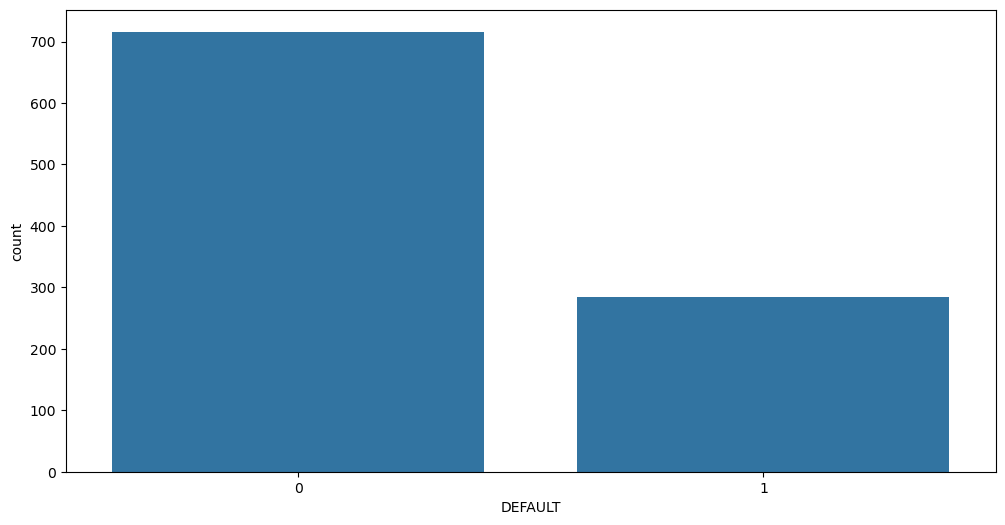

In [78]:
plt.figure(figsize=(12,6))
sns.countplot(x='DEFAULT', data=df)
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop(columns=["DEFAULT"])  # Features
y = df["DEFAULT"]                 # Target

### Split the Dataset

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Scale only the training set, then apply to test set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

 ### Train Models

In [24]:
print("Training size:", len(X_train))
print("Testing size:", len(X_test))
print("Total samples:", len(X_train) + len(X_test))


Training size: 800
Testing size: 200
Total samples: 1000


In [26]:
print("Train set class counts:")
print(y_train.value_counts())


Train set class counts:
DEFAULT
0    570
1    230
Name: count, dtype: int64


In [28]:
print("Test set class counts:")
print(y_test.value_counts())


Test set class counts:
DEFAULT
0    146
1     54
Name: count, dtype: int64


In [30]:
df['DEFAULT'].value_counts()


DEFAULT
0    716
1    284
Name: count, dtype: int64

In [74]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

# Train models on scaled data
lr.fit(X_train_scaled, y_train)
dt.fit(X_train_scaled, y_train)  # DT doesn't need scaling but won't be harmed
rf.fit(X_train_scaled, y_train)


RandomForestClassifier()

In [76]:
from sklearn.metrics import classification_report, roc_auc_score

models = {'Logistic': lr, 'Decision Tree': dt, 'Random Forest': rf}

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    print(f"--- {name} ---")
    print(classification_report(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1]))


--- Logistic ---
              precision    recall  f1-score   support

           0       0.75      0.89      0.81       143
           1       0.48      0.26      0.34        57

    accuracy                           0.71       200
   macro avg       0.62      0.58      0.58       200
weighted avg       0.68      0.71      0.68       200

ROC-AUC Score: 0.6974604343025396
--- Decision Tree ---
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       143
           1       0.43      0.40      0.41        57

    accuracy                           0.68       200
   macro avg       0.60      0.59      0.59       200
weighted avg       0.67      0.68      0.67       200

ROC-AUC Score: 0.5933627775733038
--- Random Forest ---
              precision    recall  f1-score   support

           0       0.73      0.92      0.81       143
           1       0.40      0.14      0.21        57

    accuracy                           0.69       200

In [42]:
df.shape[1]


85

### SOLVING IMBLANCE

In [78]:
df.head()

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,DEFAULT
0,33269,0,532304,0.0000,16.0000,1.2000,1889,945,0.5003,0.0568,...,1.0000,0.0000,0.0625,0,1,0,0,0,0,1
1,77158,91187,315648,1.1818,4.0909,3.4615,5818,111,0.0191,0.0754,...,0.9091,0.7692,0.2222,2,1,0,0,1,0,0
2,30917,21642,534864,0.7000,17.3000,24.7142,1157,860,0.7433,0.0374,...,1.0000,1.4286,0.0578,0,1,0,0,1,0,1
3,80657,64526,629125,0.8000,7.8000,9.7499,6857,3686,0.5376,0.0850,...,1.0000,1.2500,0.1282,0,1,0,0,1,0,0
4,149971,1172498,2399531,7.8182,16.0000,2.0465,1978,322,0.1628,0.0132,...,0.9091,0.1163,0.0568,0,1,1,1,1,1,0


In [80]:
pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [40]:
from imblearn.over_sampling import SMOTE

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# stratify=y ensures both train and test maintain the same class proportion.

print("Before SMOTE:",y_train.value_counts())


Before SMOTE: DEFAULT
0    573
1    227
Name: count, dtype: int64


In [44]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("After SMOTE:", y_train_balanced.value_counts())
# This step generates synthetic samples only for the training data.

After SMOTE: DEFAULT
0    573
1    573
Name: count, dtype: int64


In [54]:
# 1. Stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 2. Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# 4. Models
models = {
    'Logistic': LogisticRegression(random_state=42, class_weight='balanced', max_iter=2000),
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced')
}

# 5. Train and Evaluate
for name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    print(f"\n--- {name} ---")
    print(classification_report(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))



--- Logistic ---
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       143
           1       0.44      0.56      0.50        57

    accuracy                           0.68       200
   macro avg       0.62      0.64      0.63       200
weighted avg       0.70      0.68      0.68       200

ROC-AUC Score: 0.6741504109925163

--- Decision Tree ---
              precision    recall  f1-score   support

           0       0.76      0.66      0.70       143
           1       0.36      0.47      0.41        57

    accuracy                           0.60       200
   macro avg       0.56      0.57      0.56       200
weighted avg       0.64      0.60      0.62       200

ROC-AUC Score: 0.5655134339344865

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       143
           1       0.42      0.30      0.35        57

    accuracy                           0.69       